In [2]:
!pip install scanpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached scanpy-1.11.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached anndata-0.11.4-py3-none-any.whl.metadata (9.3 kB)
  Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached legacy_api_wrap-1.4.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached numba-0.61.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached session_info2-0.1.2-

In [1]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scanpy as sc

# pip install kagglehub[pandas-datasets]
import kagglehub


In [2]:
# file_path = "/tmp/cache"
file_path = '/scratch/indikar_root/indikar1/shared_data/HYB/kaggle_dataset'

kagglehub.login()

os.environ['KAGGLEHUB_CACHE']=file_path

path = kagglehub.dataset_download('thedoodler/hybrid-imaging-and-genex-dataset-hyb-imagen')

print("Path to dataset files:", path)

# usually path is
# path = '/tmp/cache/datasets/thedoodler/hybrid-imaging-and-genex-dataset-hyb-imagen/versions/2'

100%|██████████| 91.8G/91.8G [18:04<00:00, 90.9MB/s]  

Extracting files...


Path to dataset files: /scratch/indikar_root/indikar1/shared_data/HYB/kaggle_dataset/datasets/thedoodler/hybrid-imaging-and-genex-dataset-hyb-imagen/versions/3


In [10]:
def normalize_channel(channel):
    # Normalization function that takes in a matrix and normalizes it from 0-255
    min_, max_ = 50, 99.8
    norms = np.percentile(channel, [min_, max_])
    normal_channel = np.clip((channel - norms[0]) / (norms[1] - norms[0]), 0, 1)
    final_channel = (normal_channel * 255).astype(np.uint8)
    return final_channel

class HybridReprogramming():
    def __init__(self, sample, sampleID, basepath):
        self.sample = sample
        self.sampleID = sampleID
        self.channels = 3
        self.basepath = basepath

    def load_Genexpression(self):
        filepath = f'{self.basepath}/GeneExpression/Genexpression.h5ad'
        anndata = sc.read_h5ad(filepath)
        return anndata

    def load_frames(self, time_start, time_end):
        frames = []
        for t in range(time_start, time_end):
            filepath = f'{self.basepath}/Imaging/Imaging/{self.sample}/{self.sampleID}/t_{t+1}.hdf5'
            f = h5py.File(filepath, 'r')
            frame_shape = f['Scene'].shape
            frame = f['Scene'][:]
            frames.append(frame)
        framestack = np.stack(frames, axis=0)
        return framestack

### Live Cell Imaging

In [11]:

# samples - Myod, PRRX1, Myod_PRRX1, Negative_Controls

reprogramming = HybridReprogramming('Myod', 1, path)

# TagGFP : Green
# MKate : Red
# Cy5 : Blue

channelmap = {"TagGFP": 0, "MKate": 1, "Cy5": 2, "Oblique": 3}
t1, t2 = 1, 3
frames = reprogramming.load_frames(t1, t2)

timepoints, channels, shapex, shapey = frames.shape

mapshapex, mapshapey = shapex//6, shapey//5

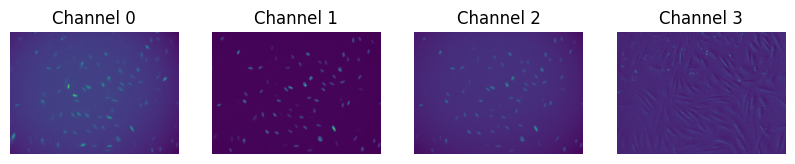

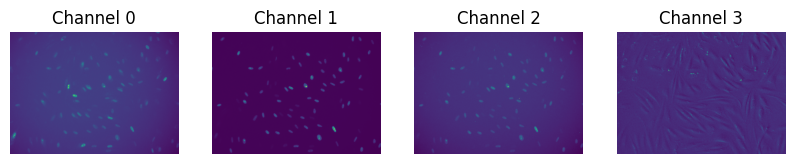

In [12]:


for time in range(timepoints):
    fig, axes = plt.subplots(nrows=1, ncols=channels, figsize=(10, 10))
    for channelName, channel in channelmap.items():
        # channel_image = frames[time, channel, ::, ::]
        channel_image = frames[time, channel, :mapshapex, :mapshapey]
        axes[channel].imshow(channel_image)
    
        axes[channel].set_title(f'Channel {channel}')
        axes[channel].axis('off')

### Gene Expression Dataset

In [13]:
gene_expression = reprogramming.load_Genexpression()

gene_expression.X

/home/nuvi/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 58145281 stored elements and shape (19760, 25549)>